In [1]:
import numpy as pd
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("Taiwanese_bankruptcy.csv")

In [3]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


<Axes: xlabel='Bankrupt?'>

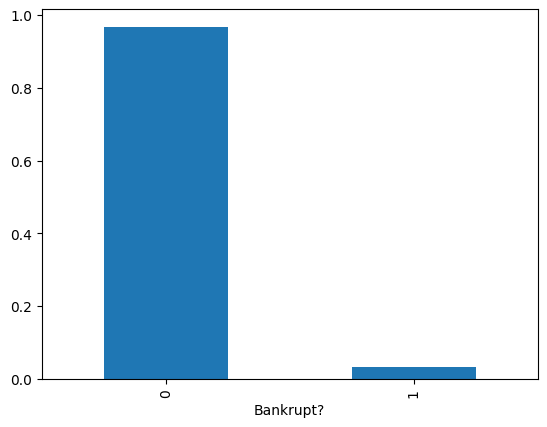

In [5]:
df['Bankrupt?'].value_counts(normalize=True).plot(kind='bar')

In [6]:
X = df.drop('Bankrupt?', axis=1)
y= df['Bankrupt?']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [8]:
over_sampler = RandomOverSampler(random_state=30)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(10566, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.532784,0.599215,0.592965,0.605868,0.605868,0.999068,0.797505,0.809316,0.303518,0.781696,...,0.798904,0.004004,0.623833,0.605865,0.840293,0.280366,0.027037,0.566110,1,0.027259
1,0.471018,0.530964,0.523208,0.604664,0.604498,0.998949,0.797336,0.809279,0.303473,0.781535,...,0.786471,0.000482,0.623609,0.604663,0.838238,0.295488,0.025825,0.511665,1,0.014884
2,0.520840,0.480866,0.577601,0.610639,0.610639,0.998997,0.797166,0.809101,0.303075,0.781566,...,0.758513,0.001237,0.620869,0.610637,0.834977,0.287557,0.026570,0.563822,1,0.017750
3,0.448642,0.469527,0.496226,0.619770,0.619770,0.998923,0.797011,0.808960,0.302961,0.781397,...,0.758177,0.000971,0.623911,0.619766,0.838053,0.275649,0.026791,0.565156,1,0.110306
4,0.496709,0.565962,0.551743,0.598120,0.598063,0.998977,0.797483,0.809402,0.303672,0.781666,...,0.810099,0.011860,0.623665,0.598122,0.841293,0.280823,0.026853,0.565437,1,0.025995


In [9]:
under_sampler = RandomUnderSampler(random_state=30)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(344, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
2799,0.613562,0.665013,0.654853,0.605731,0.605731,0.999022,0.797579,0.809464,0.303745,0.781734,...,0.859358,0.002683,0.623824,0.605729,0.845151,0.279682,0.026797,0.565185,1,0.029589
3687,0.628967,0.713476,0.696290,0.612094,0.612094,0.999151,0.797578,0.809493,0.303474,0.781765,...,0.866252,0.001472,0.624098,0.612093,0.846101,0.280491,0.026791,0.565160,1,0.026895
5269,0.521328,0.573157,0.565501,0.609197,0.609738,0.999019,0.797457,0.809365,0.303538,0.781626,...,0.816896,0.001478,0.623874,0.609198,0.842191,0.282862,0.026791,0.565158,1,0.022065
4343,0.614976,0.665395,0.648589,0.611179,0.611179,0.999138,0.797592,0.809466,0.303525,0.781736,...,0.862040,0.000654,0.624184,0.611181,0.844969,0.278814,0.026792,0.565163,1,0.033658
4569,0.528982,0.565253,0.588254,0.603951,0.603951,0.999063,0.797476,0.809399,0.303480,0.781664,...,0.811939,0.012870,0.623864,0.603952,0.841924,0.285041,0.027134,0.566393,1,0.019576


In [10]:
clf = RandomForestClassifier(random_state=42)

In [11]:
cv_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=1)
print(cv_scores)

[0.99337748 0.99574065 0.99337435 0.99621391 0.99384761]


In [12]:
params = {
    'n_estimators': range(20, 100, 25),
    'max_depth': range(10, 50, 10)
}

params

{'n_estimators': range(20, 100, 25), 'max_depth': range(10, 50, 10)}

In [13]:
model = GridSearchCV(
    clf,
    param_grid = params,
    cv = 5,
    n_jobs = 1,
    verbose = 1
)

In [ ]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
model.score(X_train_over, y_train_over)

In [35]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.560141,0.010219,0.008052,0.000483,10,20,"{'max_depth': 10, 'n_estimators': 20}",0.971618,0.981070,0.980596,0.978230,0.979650,0.978233,0.003447,16
1,1.229588,0.021970,0.012842,0.000488,10,45,"{'max_depth': 10, 'n_estimators': 45}",0.976821,0.982016,0.983436,0.978703,0.980123,0.980220,0.002342,13
2,1.889417,0.029755,0.017834,0.001232,10,70,"{'max_depth': 10, 'n_estimators': 70}",0.976821,0.982016,0.982489,0.979177,0.980123,0.980125,0.002048,15
3,2.594062,0.036764,0.022142,0.000344,10,95,"{'max_depth': 10, 'n_estimators': 95}",0.975875,0.982016,0.983436,0.979177,0.980123,0.980125,0.002588,14
4,0.666454,0.016625,0.008713,0.000328,20,20,"{'max_depth': 20, 'n_estimators': 20}",0.988174,0.992901,0.988168,0.988168,0.990062,0.989495,0.001854,12


In [36]:
best_params = model.best_params_
print(best_params)

{'max_depth': 40, 'n_estimators': 70}


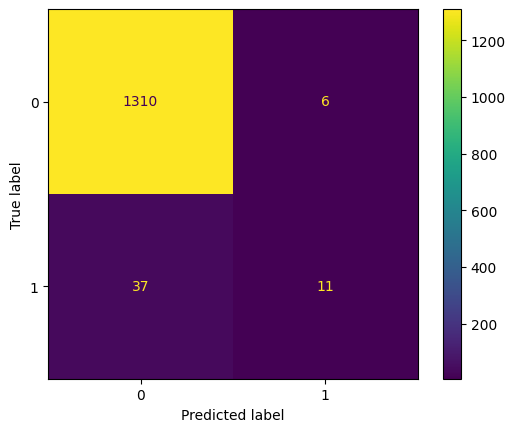

In [40]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [52]:
class_report = classification_report(y_test, model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1316
           1       0.65      0.23      0.34        48

    accuracy                           0.97      1364
   macro avg       0.81      0.61      0.66      1364
weighted avg       0.96      0.97      0.96      1364



Text(0.5, 1.0, 'Feature Importance')

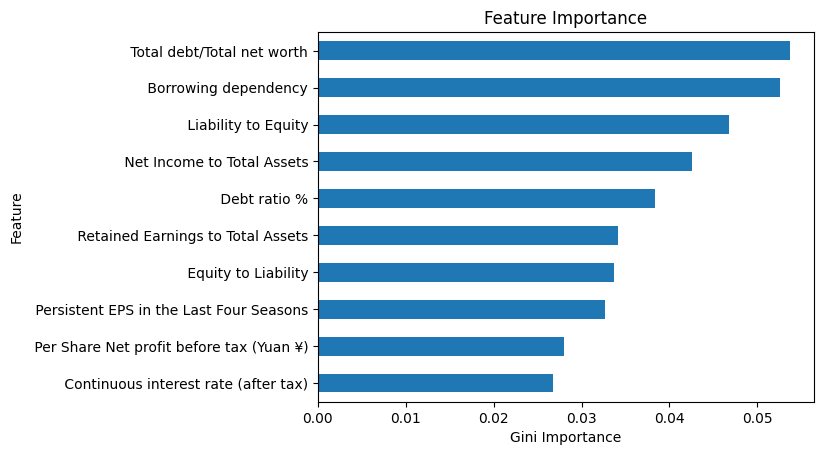

In [45]:
features = X_train_over.columns
importances = model.best_estimator_.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values()

feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

In [46]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model.best_params_, f)

In [49]:
X_test.to_csv('X_test.csv', index=False)

In [50]:
def make_predictions(data_filepath, model_filepath):

    X_test = wrangle(data_filepath)

    with open(model_filepath, 'rb') as f:
        model = pickle.load(f)
    
    y_test_pred = model.predict(X_test)

    y_test_pred = pd.Series(y_test_pred, index=X_test.index, name='bankrupt')
    return y_test_pred